<a href="https://colab.research.google.com/github/Almahari-A/Imbalanced-Credit-Card-Data-Modelling/blob/main/BDFCW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('coursework2dataset.csv')

In [ ]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.drop("Time", axis=1, inplace=True)

In [ ]:
df.head()
df1 = df.copy()
df2 = df.copy()
df3 = df.copy()
df4 = df.copy()
df5 = df.copy()
df6 = df.copy()

In [ ]:
df.isnull().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
df1.isnull().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
df1.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
x = df.drop("Class", axis=1)
y = df["Class"]

y.value_counts()  # original data points

Class
0    284315
1       492
Name: count, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split as tts
xtrain,xtest,ytrain,ytest = tts(x,y,test_size=0.2,random_state=10)

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(xtrain, ytrain)

from sklearn.metrics import accuracy_score, classification_report
y_pred = rf.predict(xtest)
print("Accuracy:", accuracy_score(ytest, y_pred))
print(classification_report(ytest, y_pred))

Accuracy: 0.9996664442961974
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56868
           1       0.99      0.81      0.89        94

    accuracy                           1.00     56962
   macro avg       0.99      0.90      0.94     56962
weighted avg       1.00      1.00      1.00     56962



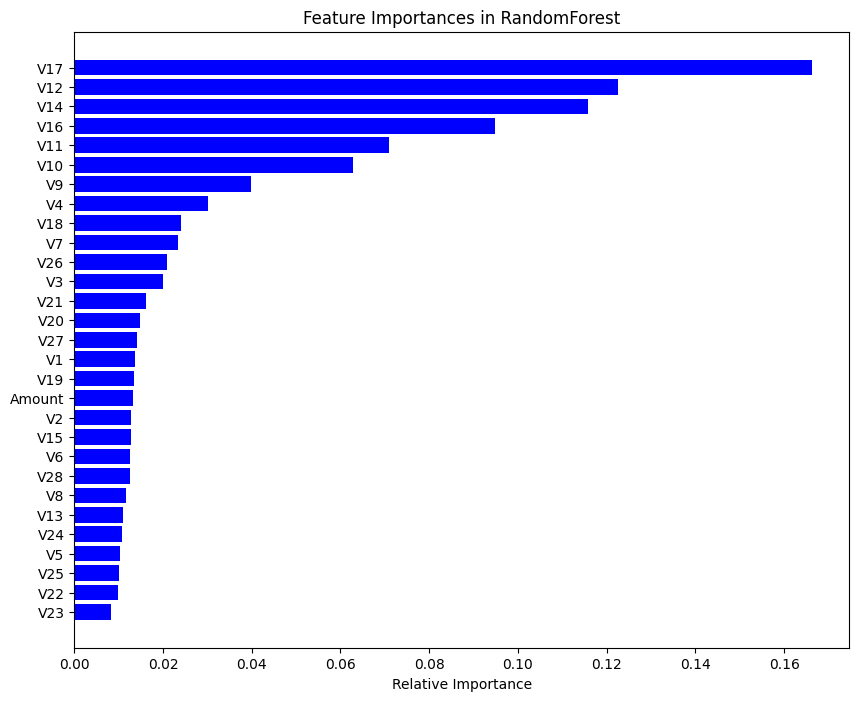

In [ ]:
importances = rf.feature_importances_
import matplotlib.pyplot as plt
import numpy as np

features = xtrain.columns
indices = np.argsort(importances)

plt.figure(figsize=(10, 8))
plt.title('Feature Importances in RandomForest')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
N = 15  # Number of top features you want to keep
top_features = [features[i] for i in indices[-N:]]  # Last N items are the most important

# Restrict your training data to these top features
xtrain_top = xtrain[top_features]
xtest_top = xtest[top_features]

rf_top = RandomForestClassifier()
rf_top.fit(xtrain_top, ytrain)

from sklearn.metrics import accuracy_score, classification_report

y_pred = rf_top.predict(xtest_top)
print("Accuracy:", accuracy_score(ytest, y_pred))
print(classification_report(ytest, y_pred))

Accuracy: 0.9996488887328394
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56868
           1       0.97      0.81      0.88        94

    accuracy                           1.00     56962
   macro avg       0.99      0.90      0.94     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
from imblearn.over_sampling import RandomOverSampler

x = df.drop('Class', axis=1)
y = df['Class']

# Instantiate the RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Resample the dataset
x_os, y_os = ros.fit_resample(x, y)

# Combine resampled features and target into a new DataFrame
os_df = pd.DataFrame(x_os, columns=x.columns)
os_df['Class'] = y_os

# Display the new balanced dataset
print("Distribution of class labels after oversampling:")
print(os_df['Class'].value_counts())

Distribution of class labels after oversampling:
Class
0    284315
1    284315
Name: count, dtype: int64


In [ ]:
from imblearn.under_sampling import NearMiss
x = df.drop('Class', axis=1)
y = df['Class']

# Instantiate the NearMiss
nm = NearMiss()

# Resample the dataset using NearMiss
x_us, y_us = nm.fit_resample(x, y)

# Combine resampled features and target into a new DataFrame
resampled_df = pd.DataFrame(x_us, columns=x.columns)
resampled_df['Class'] = y_us

# Display the new balanced dataset
print("Distribution of class labels after undersampling:")
print(resampled_df['Class'].value_counts())

Distribution of class labels after undersampling:
Class
0    492
1    492
Name: count, dtype: int64


In [ ]:
# Train RandomForest on Oversampled data
rf_os = RandomForestClassifier(random_state=42)
rf_os.fit(x_os, y_os)

# Get feature importances
importances_os = rf_os.feature_importances_

In [ ]:
# Train RandomForest on Undersampled data
rf_us = RandomForestClassifier(random_state=42)
rf_us.fit(x_us, y_us)

# Get feature importances
importances_us = rf_us.feature_importances_

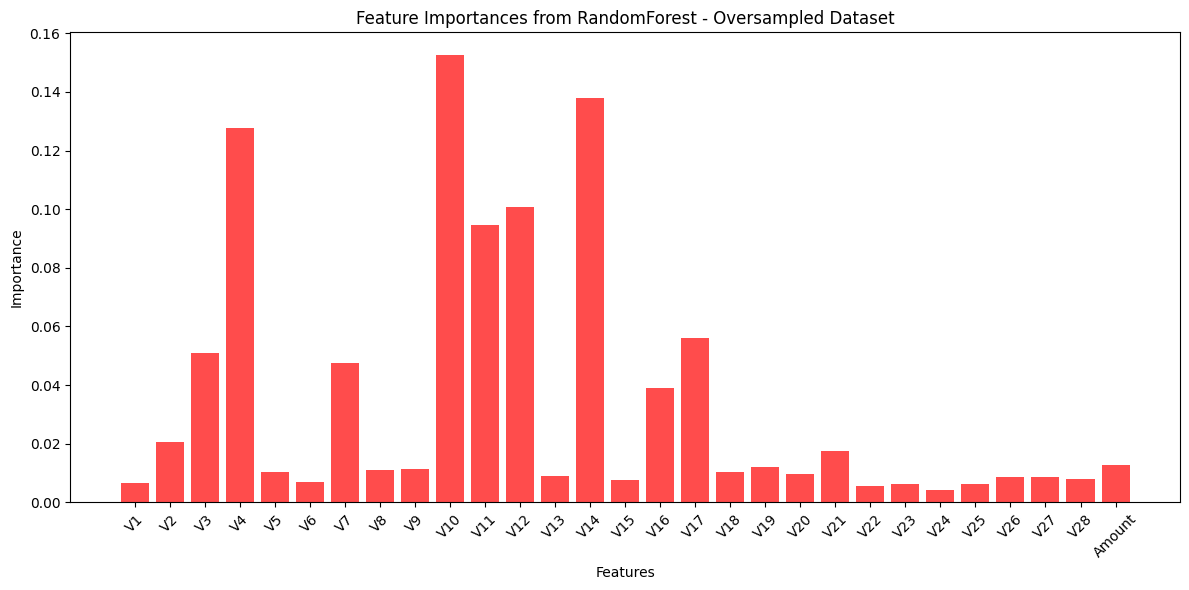

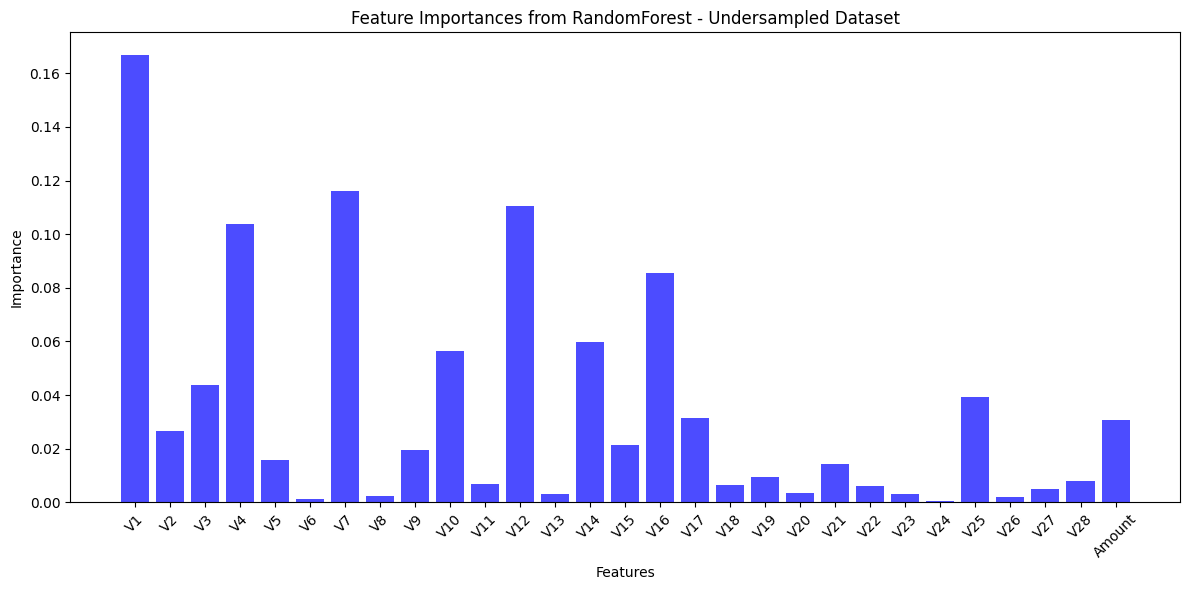

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'x_new1' is the DataFrame for the oversampled features
# and 'new_x' is the DataFrame for the undersampled features
feature_names_os = x_os.columns
feature_names_us = x_us.columns

# Plot for Oversampled Dataset
plt.figure(figsize=(12, 6))
plt.bar(feature_names_os, importances_os, color='r', alpha=0.7)
plt.title('Feature Importances from RandomForest - Oversampled Dataset')
plt.xticks(rotation=45)
plt.ylabel('Importance')
plt.xlabel('Features')
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlap
plt.show()

# Plot for Undersampled Dataset
plt.figure(figsize=(12, 6))
plt.bar(feature_names_us, importances_us, color='b', alpha=0.7)
plt.title('Feature Importances from RandomForest - Undersampled Dataset')
plt.xticks(rotation=45)
plt.ylabel('Importance')
plt.xlabel('Features')
plt.tight_layout()
plt.show()


In [ ]:
x = df.drop("Class", axis=1)
y = df["Class"]

y.value_counts()  # original data points

Class
0    284315
1       492
Name: count, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
# Split original data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Split undersampled data
X_train_us, X_test_us, y_train_us, y_test_us = train_test_split(x_us, y_us, test_size=0.2, random_state=42)

# Split oversampled data
X_train_os, X_test_os, y_train_os, y_test_os = train_test_split(x_os, y_os, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

def train_eval_logistic(X_train, X_test, y_train, y_test):
    model = LogisticRegression()
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    return score

# Evaluate on each dataset
score_original = train_eval_logistic(X_train, X_test, y_train, y_test)
score_us = train_eval_logistic(X_train_us, X_test_us, y_train_us, y_test_us)
score_os = train_eval_logistic(X_train_os, X_test_os, y_train_os, y_test_os)

In [ ]:
print("Logistic Regression Score on Original Dataset:", score_original)
print("Logistic Regression Score on Undersampled Dataset:", score_us)
print("Logistic Regression Score on Oversampled Dataset:", score_os)

Logistic Regression Score on Original Dataset: 0.9989993328885924
Logistic Regression Score on Undersampled Dataset: 0.9847715736040609
Logistic Regression Score on Oversampled Dataset: 0.9472416158134463


In [ ]:
from sklearn.svm import SVC

def train_eval_svm(X_train, X_test, y_train, y_test):
    model = SVC()
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    return score

In [ ]:
svm_original = train_eval_svm(X_train, X_test, y_train, y_test)
print("SVM original: ", svm_original)

SVM original:  0.9987711105649381


In [ ]:
svm_us = train_eval_svm(X_train_us, X_test_us, y_train_us, y_test_us)
print("SVM US: ", svm_us)

SVM US:  0.9238578680203046


In [ ]:
importances = rf.feature_importances_
feature_names = x_os.columns
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances_sorted = feature_importances.sort_values(by='Importance', ascending=False)
top_features = feature_importances_sorted['Feature'].head(12)
X_train_os_reduced = X_train_os[top_features]
X_test_os_reduced = X_test_os[top_features]

In [ ]:
svm_os = train_eval_svm(X_train_os_reduced, X_test_os_reduced, y_train_os, y_test_os)
print("SVM OS: ", svm_os)

SVM OS:  0.9561401966129117


In [ ]:
from sklearn.ensemble import RandomForestClassifier

def train_eval_rf(X_train, X_test, y_train, y_test):
    model = RandomForestClassifier()
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    return score

In [ ]:
score_original = train_eval_rf(X_train, X_test, y_train, y_test)
score_us = train_eval_rf(X_train_us, X_test_us, y_train_us, y_test_us)
score_os = train_eval_rf(X_train_os, X_test_os, y_train_os, y_test_os)

In [ ]:
print("Random Forest Score on Original Dataset:", score_original)
print("Random Forest Score on Undersampled Dataset:", score_us)
print("Random Forest Score on Oversampled Dataset:", score_os)

Random Forest Score on Original Dataset: 0.9995962220427653
Random Forest Score on Undersampled Dataset: 0.9949238578680203
Random Forest Score on Oversampled Dataset: 0.9999472416158135


In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

def train_eval_hybrid(X_train, y_train, X_test, y_test):
    pipeline = Pipeline([
        ('smote', SMOTE()),
        ('rf', RandomForestClassifier())
    ])
    pipeline.fit(X_train, y_train)
    score = pipeline.score(X_test, y_test)
    return score

In [ ]:
hybrid_original = train_eval_rf(X_train, X_test, y_train, y_test)
print("Hybrid Score on Original Dataset:", hybrid_original)

Hybrid Score on Original Dataset: 0.9995611109160493


In [ ]:
hybrid_us = train_eval_rf(X_train_us, X_test_us, y_train_us, y_test_us)
print("Hybrid Score on Undersampled Dataset:", hybrid_us)

Hybrid Score on Undersampled Dataset: 0.9949238578680203


In [ ]:
hybrid_os = train_eval_rf(X_train_os, X_test_os, y_train_os, y_test_os)
print("Hybrid Score on Oversampled Dataset:", hybrid_os)

Hybrid Score on Oversampled Dataset: 0.9999648277438756


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Scale each dataset
scaler_original = StandardScaler()
scaler_os = StandardScaler()
scaler_us = StandardScaler()

X_scaled = scaler_original.fit_transform(x)
X_scaled_os = scaler_os.fit_transform(x_os)  # Assuming 'x_new1' and 'y_new1' are your oversampled datasets
X_scaled_us = scaler_us.fit_transform(x_us)  # Assuming 'new_x' and 'new_y' are your undersampled datasets

# Split each scaled dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train_os, X_test_os, y_train_os, y_test_os = train_test_split(X_scaled_os, y_os, test_size=0.2, random_state=42)
X_train_us, X_test_us, y_train_us, y_test_us = train_test_split(X_scaled_us, y_us, test_size=0.2, random_state=42)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def train_eval_nn(X_train, y_train, X_test, y_test):
    model = Sequential([
        Dense(64, activation='relu', input_dim=X_train.shape[1]),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)
    _, score = model.evaluate(X_test, y_test, verbose=1)
    return score


In [ ]:
# Original dataset
nn_original = train_eval_nn(X_train, y_train, X_test, y_test)
print("Deep NN Score on Original Dataset:", nn_original)

# Oversampled dataset
nn_os = train_eval_nn(X_train_os, y_train_os, X_test_os, y_test_os)
print("Deep NN Score on Oversampled Dataset:", nn_os)

# Undersampled dataset
nn_us = train_eval_nn(X_train_us, y_train_us, X_test_us, y_test_us)
print("Deep NN Score on Undersampled Dataset:", nn_us)


Epoch 1/10
7121/7121 [==============================] - 18s 2ms/step - loss: 0.0061 - accuracy: 0.9992
Epoch 2/10
7121/7121 [==============================] - 14s 2ms/step - loss: 0.0031 - accuracy: 0.9994
Epoch 3/10
7121/7121 [==============================] - 16s 2ms/step - loss: 0.0027 - accuracy: 0.9994
Epoch 4/10
7121/7121 [==============================] - 14s 2ms/step - loss: 0.0025 - accuracy: 0.9994
Epoch 5/10
7121/7121 [==============================] - 13s 2ms/step - loss: 0.0024 - accuracy: 0.9995
Epoch 6/10
7121/7121 [==============================] - 14s 2ms/step - loss: 0.0022 - accuracy: 0.9995
Epoch 7/10
7121/7121 [==============================] - 13s 2ms/step - loss: 0.0022 - accuracy: 0.9995
Epoch 8/10
7121/7121 [==============================] - 13s 2ms/step - loss: 0.0021 - accuracy: 0.9995
Epoch 9/10
7121/7121 [==============================] - 14s 2ms/step - loss: 0.0020 - accuracy: 0.9996
Epoch 10/10
1781/1781 [==============================] - 4s 2ms/step - lo